In [19]:
%pip install torch matplotlib numpy


Note: you may need to restart the kernel to use updated packages.


# 22.8. Distributions

## 1. Introduction

### Problem Statement

In Computer Science, we rarely operate in a perfect, predictable world. Real-world data is noisy, hardware components have inherent failure rates, and user behavior fluctuates randomly. To build robust systems—whether it is a neural network recognizing images or a distributed database ensuring consistency—we cannot simply guess. We need probability distributions.

Probability distributions provide the essential framework to quantify uncertainty. They allow us to model variables ranging from discrete binary choices (like a "yes/no" click) to continuous signals (like audio frequencies or pixel intensities). By understanding the underlying distribution of our data, we can calculate risks, optimize performance, and train algorithms to make accurate predictions even in the presence of noise.

### Applications in Computer Science

This document bridges the gap between statistical theory and code, exploring how fundamental distributions are applied to solve core computing challenges:

- **Binary Classification (Spam Filter):** We utilize the Bernoulli distribution as the foundation for modeling binary outcomes. This is the core mechanism behind binary classifiers, such as spam detection algorithms that categorize emails as either "Spam" (1) or "Not Spam" (0).
    
- **Load Balancing:** We apply the Uniform distribution to algorithms requiring fairness and unpredictability. In distributed systems, random server selection ensures that incoming traffic is spread evenly across resources, preventing bottlenecks.
    
- **System Reliability (Server requests):** We use the Poisson distribution to model the rate at which events occur over a fixed period. This is critical for tasks like analyzing server log traffic, predicting request arrivals, or detecting anomalies like DDoS attacks where event frequency deviates from the norm.
    
- **Noise Modeling & Weight Initialization:** We examine the Gaussian (Normal) distribution, the most common distribution in nature. In Machine Learning, it is essential for modeling symmetric noise in data and is frequently used to initialize the weights of Neural Networks to ensure effective training dynamics.

From the discrete simplicity of a Bernoulli trial to the continuous complexity of the Gaussian bell curve, and the rare-event modeling of the Poisson, this guide provides the mathematical definitions, step-by-step proofs, and practical Python implementations for each. Let us dive into the probability theories that power intelligent computing.

## 2.1. Bernoulli Distribution

### Definition 

The Bernoulli distribution models a random experiment that has only two possible outcomes: **Success** (denoted as 1) or **Failure** (denoted as 0).

A classic example is tossing a coin: heads is 1, tails is 0.

If a random variable $X$ follows this distribution with success probability $p$ (where $0 \le p \le 1$), we denote:

$$X \sim \text{Bernoulli}(p)$$

**Probability Mass Function (PMF):**

The probability that $X$ takes the value $x$ is:

$$P(X=x) = \begin{cases} p & \text{if } x = 1 \\ 1-p & \text{if } x = 0 \end{cases}$$



**Cumulative Distribution Function (CDF):**

$$F(x) = \begin{cases}

0 & x < 0 \\

1-p & 0 \le x < 1 \\

1 & x \ge 1

\end{cases}$$

**Mean:**

$$\mu_X = p$$

**Variance:**

$$\sigma_X^2 = p(1-p)$$
    

### Graph

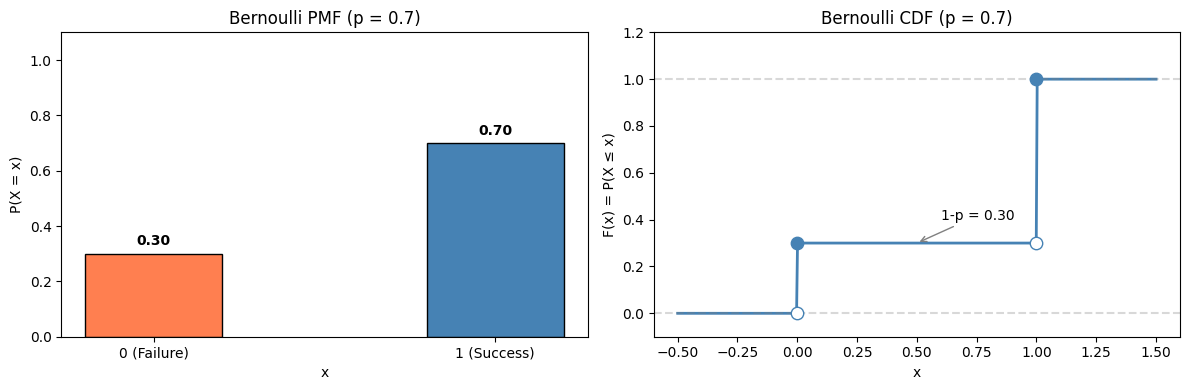

Bernoulli Distribution with p = 0.7
  PMF: P(X=0) = 0.30, P(X=1) = 0.70
  Mean (μ) = p = 0.70
  Variance (σ²) = p(1-p) = 0.2100


In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Bernoulli parameter
p = 0.7  # Success probability

# --- PMF Plot ---
x_pmf = [0, 1]
pmf_values = [1 - p, p]  # P(X=0) = 1-p, P(X=1) = p

# --- CDF Plot ---
# CDF is a step function: 0 for x<0, (1-p) for 0<=x<1, 1 for x>=1
x_cdf = np.linspace(-0.5, 1.5, 500)
cdf_values = np.where(x_cdf < 0, 0, np.where(x_cdf < 1, 1 - p, 1))

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# PMF plot (bar chart)
axes[0].bar(x_pmf, pmf_values, color=['coral', 'steelblue'], edgecolor='black', width=0.4)
axes[0].set_xlabel('x')
axes[0].set_ylabel('P(X = x)')
axes[0].set_title(f'Bernoulli PMF (p = {p})')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['0 (Failure)', '1 (Success)'])
axes[0].set_ylim(0, 1.1)
# Add value labels on bars
for i, v in enumerate(pmf_values):
    axes[0].text(x_pmf[i], v + 0.03, f'{v:.2f}', ha='center', fontweight='bold')

# CDF plot (step function)
axes[1].plot(x_cdf, cdf_values, color='steelblue', linewidth=2)
# Mark the jump points
axes[1].scatter([0, 1], [1 - p, 1], color='steelblue', s=80, zorder=5)  # Closed points
axes[1].scatter([0, 1], [0, 1 - p], facecolors='white', edgecolors='steelblue', s=80, zorder=5)  # Open points
axes[1].axhline(y=0, color='gray', linestyle='--', alpha=0.3)
axes[1].axhline(y=1, color='gray', linestyle='--', alpha=0.3)
axes[1].set_xlabel('x')
axes[1].set_ylabel('F(x) = P(X ≤ x)')
axes[1].set_title(f'Bernoulli CDF (p = {p})')
axes[1].set_ylim(-0.1, 1.2)
# Add annotations
axes[1].annotate(f'1-p = {1-p:.2f}', xy=(0.5, 1-p), xytext=(0.6, 1-p+0.1),
                 arrowprops=dict(arrowstyle='->', color='gray'), fontsize=10)

plt.tight_layout()
plt.show()

print(f"Bernoulli Distribution with p = {p}")
print(f"  PMF: P(X=0) = {1-p:.2f}, P(X=1) = {p:.2f}")
print(f"  Mean (μ) = p = {p:.2f}")
print(f"  Variance (σ²) = p(1-p) = {p*(1-p):.4f}")


### Step-by-step Computation 

**Probability Mass Function (PMF)**

_Original Definition:_

The Bernoulli random variable $X$ has only two outcomes:

- $X=1$ (Success) with probability $p$.
    
- $X=0$ (Failure) with probability $1-p$.
    

So it can be seen that the p.m.f formula is correct.

**Cumulative Distribution Function (CDF)**

_Original Definition:_

The cumulative distribution function is the probability that the random variable $X$ takes a value less than or equal to a certain level $x$:

$$F(x) = P(X \le x)$$

_Formula to be proved:_

$$F(x) = \begin{cases} 0 & x < 0 \\ 1-p & 0 \le x < 1 \\ 1 & x \ge 1 \end{cases}$$

_Consider each interval:_

- $x < 0$
    
    Random variable $X$ only takes values 0 or 1. There is no value of $X$ smaller than a negative number (e.g., $x = -0.5$). Therefore, the event $\{X \le x\}$ is an impossible event. Thus: $F(x) = P(\emptyset) = 0$
    
- $0 \le x < 1$ (Example: $x = 0.5$)
    
    Among the possible values of $X$ ($0$ and $1$), only the value $0$ satisfies the condition of being less than or equal to $x$ (e.g., $\le 0.5$). Thus $P(X \le x) = P(X=0)$.
    
    According to the PMF section above, $P(X=0) = 1-p$. Thus: $F(x) = 1-p$
    
- $x \ge 1$ (Example: $x = 1.5$)
    
    The values of $X$ are $0$ and $1$, which satisfy $\le 1.5$. Thus $P(X \le x) = P(X=0) + P(X=1)$.
    
    Thus: $F(x) = (1-p) + p = 1$
    

**Expectation ($\mu_X$):**

According to the definition of expectation for discrete variables:

$$\begin{aligned} \mathbb{E}[X] &= \sum x \cdot P(X=x) \\ &= 1 \cdot P(X=1) + 0 \cdot P(X=0) \\ &= 1 \cdot p + 0 \cdot (1-p) \quad \text{(by p.m.f definition)} \\ &= p \end{aligned}$$

**Variance ($\sigma_X^2$):**

According to the definition of expectation: $\text{Var}(X) = \mathbb{E}[X^2] - (\mathbb{E}[X])^2$.

We have the second moment:

$$\begin{aligned} \mathbb{E}[X^2] &= \sum x^2 \cdot P(X=x) \\ &= 1^2 \cdot P(X=1) + 0^2 \cdot P(X=0) \\ &= 1 \cdot p + 0 \cdot (1-p) \\ &= p \end{aligned}$$

Therefore: $\text{Var}(X) = p - p^2 = p(1 - p)$


### Concrete Example

In CS, Bernoulli appears everywhere in the form of **Binary Classification**.

- **Example:** An email arrives in your inbox. It can be **Spam (1)** or **Not Spam (0)**.
    
- **Model:** An AI model (like Logistic Regression) will predict the probability $p$ that the email is Spam. If $p > 0.5$, we classify it as 1, otherwise 0.
    
- Each data label ($y$) in the training set of a binary classification problem is a Bernoulli random variable.


### Python Implementation

In [20]:
import torch

# Suppose we have 5 incoming emails
# This is the probability P(Spam) that AI predicts based on the content of each email
# (Email 1 is very spam-like, Email 2 is very safe...)
predicted_probs = torch.tensor([0.95, 0.10, 0.80, 0.05, 0.60])

print("Predicted probabilities (P):", predicted_probs)

# Classification threshold, usually 0.5
threshold = 0.5

# DECISION (Classification)
# If p > 0.5 then 1 (Spam), otherwise 0 (Normal)
# .float() to convert True/False to 1.0/0.0
predictions = (predicted_probs > threshold).float()

print("Classification labels (y_hat):", predictions)

# Explain results
for i, pred in enumerate(predictions):
    label = "SPAM" if pred == 1 else "NORMAL"
    print(f"Email {i+1}: {label} (p={predicted_probs[i]:.2f})")

Predicted probabilities (P): 

tensor([0.9500, 0.1000, 0.8000, 0.0500, 0.6000])
Classification labels (y_hat): tensor([1., 0., 1., 0., 1.])
Email 1: SPAM (p=0.95)
Email 2: NORMAL (p=0.10)
Email 3: SPAM (p=0.80)
Email 4: NORMAL (p=0.05)
Email 5: SPAM (p=0.60)


## 2.2. Discrete Uniform Distribution

### Definition

This distribution is used to describe the case where we randomly select an integer from the set $\{1, 2, ..., n\}$ where every value is equally likely to occur (e.g., rolling a 6-sided die, so $n=6$).

**Notation:** $X \sim U(n)$.

**Probability Mass Function (PMF):**

Since there are $n$ values and equal probability, the probability of each value is $\frac{1}{n}$.

$$p_i = P(X=i) = \frac{1}{n} \quad \text{for } i \in \{1, 2, ..., n\}$$


**Cumulative Distribution Function (CDF):**

$$F(x) = \begin{cases}

0 & x < 1 \\

\frac{\lfloor x \rfloor}{n} & 1 \le x < n \\

1 & x \ge n

\end{cases}$$

$\lfloor x \rfloor$ is the floor value of x

**Mean (Expectation):**

$$\mu_X = \frac{n+1}{2}$$

**Variance:**

$$\sigma_X^2 = \frac{n^2-1}{12}$$


### Graph


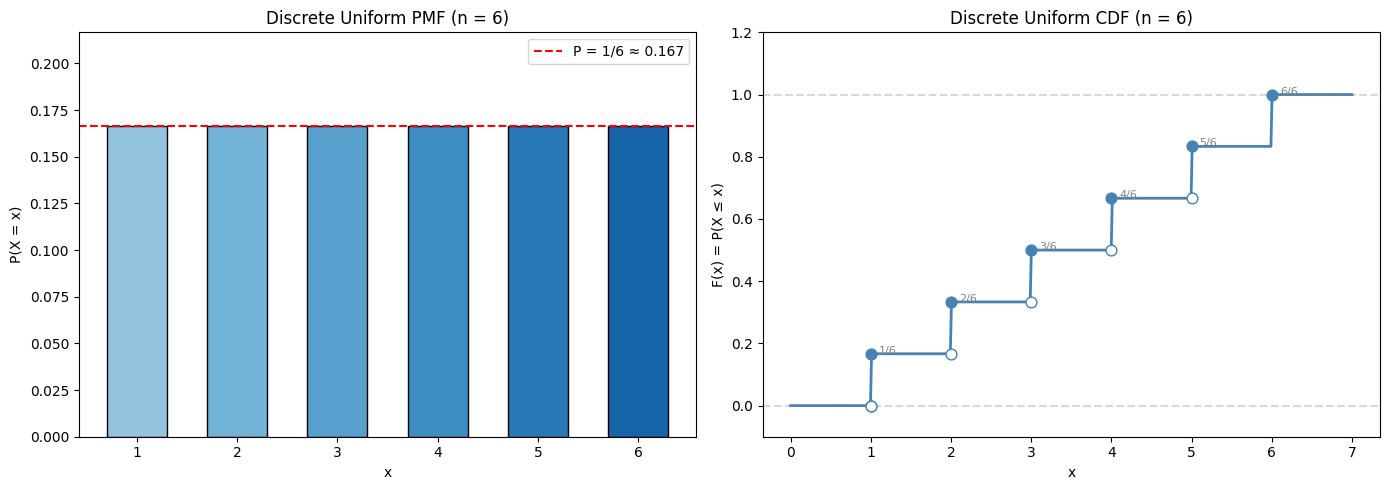

Discrete Uniform Distribution U(6)
  PMF: P(X=i) = 1/6 = 0.1667 for i ∈ {1, 2, ..., 6}
  Mean (μ) = (n+1)/2 = 3.50
  Variance (σ²) = (n²-1)/12 = 2.9167


In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Discrete Uniform parameter
n = 6  # Number of outcomes (like a 6-sided die)

# --- PMF Plot ---
x_pmf = list(range(1, n + 1))  # {1, 2, ..., n}
pmf_values = [1 / n] * n  # Each value has probability 1/n

# --- CDF Plot ---
# CDF is a step function: 0 for x<1, floor(x)/n for 1<=x<n, 1 for x>=n
x_cdf = np.linspace(0, n + 1, 500)
cdf_values = np.where(x_cdf < 1, 0, np.where(x_cdf < n, np.floor(x_cdf) / n, 1))

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PMF plot (bar chart)
colors = plt.cm.Blues(np.linspace(0.4, 0.8, n))
axes[0].bar(x_pmf, pmf_values, color=colors, edgecolor='black', width=0.6)
axes[0].set_xlabel('x')
axes[0].set_ylabel('P(X = x)')
axes[0].set_title(f'Discrete Uniform PMF (n = {n})')
axes[0].set_xticks(x_pmf)
axes[0].set_ylim(0, max(pmf_values) * 1.3)
# Add horizontal line showing equal probability
axes[0].axhline(y=1/n, color='red', linestyle='--', linewidth=1.5, label=f'P = 1/{n} ≈ {1/n:.3f}')
axes[0].legend()

# CDF plot (step function)
axes[1].plot(x_cdf, cdf_values, color='steelblue', linewidth=2)
# Mark the jump points (closed circles at each integer)
for i in range(1, n + 1):
    axes[1].scatter([i], [i / n], color='steelblue', s=60, zorder=5)  # Closed points
    if i < n:
        axes[1].scatter([i], [(i - 1) / n], facecolors='white', edgecolors='steelblue', s=60, zorder=5)  # Open points
# Open point at x=1 for F(x)=0
axes[1].scatter([1], [0], facecolors='white', edgecolors='steelblue', s=60, zorder=5)
axes[1].axhline(y=0, color='gray', linestyle='--', alpha=0.3)
axes[1].axhline(y=1, color='gray', linestyle='--', alpha=0.3)
axes[1].set_xlabel('x')
axes[1].set_ylabel('F(x) = P(X ≤ x)')
axes[1].set_title(f'Discrete Uniform CDF (n = {n})')
axes[1].set_ylim(-0.1, 1.2)
axes[1].set_xticks(range(0, n + 2))
# Add step annotations
for i in range(1, n + 1):
    axes[1].annotate(f'{i}/{n}', xy=(i + 0.1, i / n), fontsize=8, color='gray')

plt.tight_layout()
plt.show()

# Print statistics
mean = (n + 1) / 2
variance = (n**2 - 1) / 12
print(f"Discrete Uniform Distribution U({n})")
print(f"  PMF: P(X=i) = 1/{n} = {1/n:.4f} for i ∈ {{1, 2, ..., {n}}}")
print(f"  Mean (μ) = (n+1)/2 = {mean:.2f}")
print(f"  Variance (σ²) = (n²-1)/12 = {variance:.4f}")


### Step-by-step Computation 

### Cumulative Distribution Function (PDF):

Suppose we have a random variable $X$ following a discrete uniform distribution on the set of integers $\{1, 2, \dots, n\}$.

The probability mass function (PMF): $P(X=k) = \frac{1}{n}$ for all $k \in \{1, \dots, n\}$.

According to the CDF definition:

$$F(x) = \begin{cases}
   0 & x < 1 \\
   \frac{\lfloor x \rfloor}{n} & 1 \le x < n \\
   1 & x \ge n
\end{cases}$$

We consider 3 cases of $x$ on the real number line:

Case 1: $x < 1$

Random variable $X$ only takes values from $1$ onwards.

Therefore, there is no value of $X$ satisfying smaller than $x$ (when $x < 1$).

The event $\{X \le x\}$ is an empty set.

$$F(x) = 0$$

Case 2: $1 \le x < n$

This is the most interesting part using the floor function.

We need to calculate the sum of probabilities of all integer values $k$ such that $1 \le k \le x$.

Since $k$ must be an integer, the condition $k \le x$ is equivalent to $k \le \lfloor x \rfloor$ (the largest integer not exceeding $x$).

Thus the valid values of $X$ are: $\{1, 2, \dots, \lfloor x \rfloor\}$.

The quantity of these values is exactly $\lfloor x \rfloor$.

Since each value has a probability equal to $\frac{1}{n}$, we have:

$$F(x) = \underbrace{\frac{1}{n} + \frac{1}{n} + \dots + \frac{1}{n}}_{\lfloor x \rfloor \text{ times}} = \lfloor x \rfloor \cdot \frac{1}{n} = \frac{\lfloor x \rfloor}{n}$$

Case 3: $x \ge n$

When $x \ge n$, the cumulative interval $(-\infty, x]$ has covered the entire set of possible values $\{1, 2, \dots, n\}$ of the random variable.

The total probability of the entire sample space is always 1.

$$F(x) = 1$$

**Expectation ($\mu_X$):**

We have:

$$\mathbb{E}[X] = \sum_{x_i=1}^n x_i \cdot P(X=x_i)$$

Substituting $P(X=i) = \frac{1}{n}$, we get:

$$\mathbb{E}[X] = \sum_{x_i=1}^n x_i \cdot \frac{1}{n} = \frac{1}{n} \sum_{x_i=1}^n x_i$$

Applying the sum of natural numbers formula: $1+2+...+n = \frac{n(n+1)}{2}$, we have:

$$\mathbb{E}[X] = \frac{1}{n} \cdot \frac{n(n+1)}{2} = \frac{n+1}{2}$$

**Variance ($\sigma_X^2$):**

According to the definition of variance: $\text{Var}(X) = \mathbb{E}[X^2] - (\mathbb{E}[X])^2$.

We have the second moment ($\mathbb{E}[X^2]$):

$$\begin{aligned} \mathbb{E}[X^2] &= \sum_{x_i=1}^n x_i^2 \cdot P(X=x_i) \\[8pt] &= \sum_{x_i=1}^n x_i^2 \cdot \frac{1}{n} \\[8pt] &= \frac{1}{n} \sum_{x_i=1}^n x_i^2 \end{aligned}$$

Applying the sum of squares formula: $1^2 + ... + n^2 = \frac{n(n+1)(2n+1)}{6}$, we have:

$$\mathbb{E}[X^2] = \frac{1}{n} \cdot \frac{n(n+1)(2n+1)}{6} = \frac{(n+1)(2n+1)}{6}$$

Therefore:

$$\begin{aligned} \text{Var}(X) &= \frac{(n+1)(2n+1)}{6} - \left( \frac{n+1}{2} \right)^2 \\[8pt] &= \frac{(n+1)(2n+1)}{6} - \frac{(n+1)^2}{4} \\[8pt] &= \frac{2(n+1)(2n+1)}{12} - \frac{3(n+1)^2}{12} \\[8pt] &= \frac{n+1}{12} \left[ 2(2n+1) - 3(n+1) \right] \\[8pt] &= \frac{n+1}{12} \left[ 4n + 2 - 3n - 3 \right] \\[8pt] &= \frac{n+1}{12} [n - 1] \\[8pt] &= \frac{n^2 - 1}{12} \end{aligned}$$


### Concrete Example

### Load balancing
Suppose you have $n$ servers to serve users. When a new request arrives, you need to decide which server to route it to for processing.

The simplest but most effective strategy is **Random Selection**:

- Randomly select a server from the list $\{1, 2, ..., n\}$.
    
- The probability of choosing each server is equal: $p = \frac{1}{n}$.
    

This is exactly a random variable following the **Discrete Uniform** $U(n)$ distribution.

- **Benefits:** Stateless, extremely fast, and mathematically (Law of Large Numbers), when the request volume is large enough, the load will be distributed evenly across the machines.


### Python Implementation 

We will simulate the situation:

- The system has **5 Servers**.
    
- Receives **1,000,000 Requests**.
    
- We will use `torch.randint` to route requests according to a uniform distribution and check if the load is truly balanced.

In [21]:
    
import torch

# 1. System Configuration
num_servers = 5
num_requests = 1000000 # 1 million requests

# 2. Load Balancer: Route requests
# Randomly select a server index from 0 to 4 for each request
# This is the Discrete Uniform U(0, 4) distribution
# torch.randint generates integers in [low, high), so we set high=num_servers
server_indices = torch.randint(0, num_servers, size=(num_requests,))

# 3. Load statistics on each server
# torch.bincount counts the occurrences of each index
server_loads = torch.bincount(server_indices)

print(f"Total Requests: {num_requests}")
print("-" * 30)

for i in range(num_servers):
    load = server_loads[i].item()
    percent = (load / num_requests) * 100
    print(f"Server {i+1}: {load} requests ({percent:.2f}%)")

print("-" * 30)

# 4. Evaluate deviation
# Ideal: Each server receives exactly 20% (200,000 requests)
max_load = server_loads.max().item()
min_load = server_loads.min().item()
diff = max_load - min_load

print(f"Difference between busiest and freest server: {diff} requests")
print(f"Percentage deviation: {diff / num_requests * 100:.4f}%")

Total Requests: 1000000
------------------------------
Server 1: 200410 requests (20.04%)
Server 2: 199726 requests (19.97%)
Server 3: 199986 requests (20.00%)
Server 4: 200111 requests (20.01%)
Server 5: 199767 requests (19.98%)
------------------------------
Difference between busiest and freest server: 684 requests
Percentage deviation: 0.0684%


## 2.3. Continuous Uniform Distribution

### Definition

The continuous uniform distribution is a distribution where probability is equally likely for all outcomes of a continuous random variable.

This distribution appears when we take the discrete uniform distribution (choosing 1 of $n$ numbers), increase $n$ to infinity, and stretch it to fit in an interval $[a, b]$. It represents choosing a random value arbitrarily in the interval $[a, b]$ with equal probability.

**Notation:** $X \sim U(a, b)$.

**Probability Density Function (PDF):**

Unlike the discrete case (PMF), for continuous variables we use "density". Since the probability of picking an exact specific point is 0, we only care about the probability falling into an _interval_.

To make the total area under the graph equal to 1 (total probability = 1), the height of the rectangle on the segment $[a, b]$ must be $\frac{1}{b-a}$.

$$p(x) = \begin{cases} \frac{1}{b-a} & \text{if } a \le x \le b \\ 0 & \text{if } x < a \text{ or } x > b \end{cases}$$

**Cumulative Distribution Function (CDF):**

This is the area calculated from the left to point $x$.

$$F(x) = \begin{cases} 0 & \text{for } x < a, \\ \frac{x-a}{b-a} & \text{for } a \le x \le b, \\ 1 & \text{for } x > b. \end{cases}$$

**Expectation:**

$$\mu_X = \frac{a+b}{2}$$

**Variance:**

$$\sigma_X^2 = \frac{(b-a)^2}{12}$$


### Graph


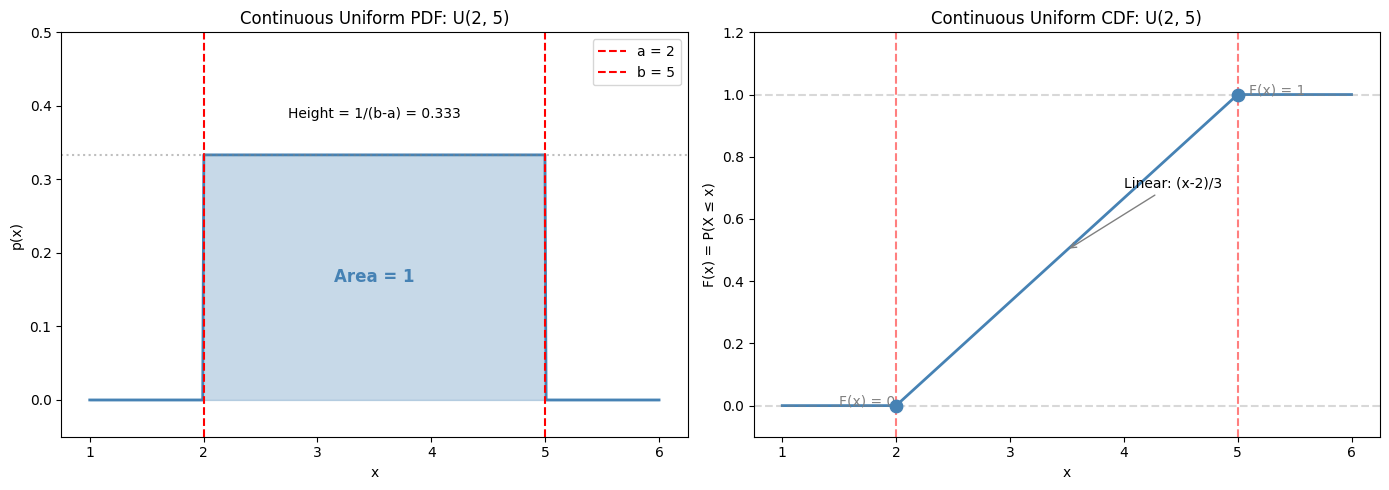

Continuous Uniform Distribution U(2, 5)
  PDF: p(x) = 1/(b-a) = 0.3333 for x ∈ [2, 5]
  Mean (μ) = (a+b)/2 = 3.50
  Variance (σ²) = (b-a)²/12 = 0.7500


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Continuous Uniform parameters
a, b = 2, 5  # Interval [a, b]

# --- PDF Plot ---
x_pdf = np.linspace(a - 1, b + 1, 500)
pdf_values = np.where((x_pdf >= a) & (x_pdf <= b), 1 / (b - a), 0)

# --- CDF Plot ---
x_cdf = np.linspace(a - 1, b + 1, 500)
cdf_values = np.where(x_cdf < a, 0, np.where(x_cdf <= b, (x_cdf - a) / (b - a), 1))

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PDF plot (rectangle)
axes[0].plot(x_pdf, pdf_values, color='steelblue', linewidth=2)
axes[0].fill_between(x_pdf, pdf_values, alpha=0.3, color='steelblue')
# Mark the boundaries
axes[0].axvline(x=a, color='red', linestyle='--', linewidth=1.5, label=f'a = {a}')
axes[0].axvline(x=b, color='red', linestyle='--', linewidth=1.5, label=f'b = {b}')
axes[0].axhline(y=1/(b-a), color='gray', linestyle=':', alpha=0.5)
axes[0].set_xlabel('x')
axes[0].set_ylabel('p(x)')
axes[0].set_title(f'Continuous Uniform PDF: U({a}, {b})')
axes[0].set_ylim(-0.05, 1/(b-a) * 1.5)
axes[0].legend()
# Add annotation for height
axes[0].annotate(f'Height = 1/(b-a) = {1/(b-a):.3f}', 
                 xy=((a+b)/2, 1/(b-a)), xytext=((a+b)/2, 1/(b-a) + 0.05),
                 ha='center', fontsize=10)
# Add annotation for area
axes[0].text((a+b)/2, 1/(b-a)/2, 'Area = 1', ha='center', va='center', 
             fontsize=12, fontweight='bold', color='steelblue')

# CDF plot (linear ramp)
axes[1].plot(x_cdf, cdf_values, color='steelblue', linewidth=2)
# Mark key points
axes[1].scatter([a, b], [0, 1], color='steelblue', s=80, zorder=5)
axes[1].axvline(x=a, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
axes[1].axvline(x=b, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
axes[1].axhline(y=0, color='gray', linestyle='--', alpha=0.3)
axes[1].axhline(y=1, color='gray', linestyle='--', alpha=0.3)
axes[1].set_xlabel('x')
axes[1].set_ylabel('F(x) = P(X ≤ x)')
axes[1].set_title(f'Continuous Uniform CDF: U({a}, {b})')
axes[1].set_ylim(-0.1, 1.2)
# Add annotations
axes[1].annotate('F(x) = 0', xy=(a-0.5, 0), fontsize=10, color='gray')
axes[1].annotate('F(x) = 1', xy=(b+0.1, 1), fontsize=10, color='gray')
axes[1].annotate(f'Linear: (x-{a})/{b-a}', xy=((a+b)/2, 0.5), xytext=((a+b)/2 + 0.5, 0.7),
                 arrowprops=dict(arrowstyle='->', color='gray'), fontsize=10)

plt.tight_layout()
plt.show()

# Print statistics
mean = (a + b) / 2
variance = (b - a)**2 / 12
print(f"Continuous Uniform Distribution U({a}, {b})")
print(f"  PDF: p(x) = 1/(b-a) = {1/(b-a):.4f} for x ∈ [{a}, {b}]")
print(f"  Mean (μ) = (a+b)/2 = {mean:.2f}")
print(f"  Variance (σ²) = (b-a)²/12 = {variance:.4f}")


### Step-by-step Computation

**Probability Density Function**

The total probability of the entire sample space must be **1**. For a continuous variable, this means the area under the PDF curve must equal 1.

$$\int_{-\infty}^{+\infty} p(x) \, dx = 1$$

Since $p(x) = 0$ when $x$ is outside $[a, b]$, we only need to integrate within the interval $[a, b]$:

$$\begin{aligned} & \int_{a}^{b} k \, dx = 1 \\ \Leftrightarrow \quad & k \cdot \int_{a}^{b} 1 \, dx = 1 \\ \Leftrightarrow \quad & k \cdot [x]_{a}^{b} = 1 \\ \Leftrightarrow \quad & k \cdot (b - a) = 1 \\ \Leftrightarrow \quad & k = \frac{1}{b-a} \end{aligned}$$

Thus we have the formula: $p(x) = \frac{1}{b-a}$ in the interval $[a, b]$.

**Cumulative Distribution Function (CDF)**

_Assumption (Probability Density Function - PDF):_

The probability density function of the continuous uniform distribution $U(a, b)$ is:

$$p(t) = \begin{cases} \frac{1}{b-a} & a \le t \le b \\ 0 & \text{otherwise} \end{cases}$$

_CDF Definition:_

The cumulative distribution function is the probability that the random variable $X$ takes a value less than or equal to $x$, calculated by the integral of the density function:

$$F(x) = P(X \le x) = \int_{-\infty}^{x} p(t) \, dt$$

_Formula to be proved:_

$$F(x) = \begin{cases} 0 & x < a \\ \frac{x-a}{b-a} & a \le x \le b \\ 1 & x > b \end{cases}$$

_Consider each interval:_

- $x < a$ (Left of the domain)
    
    When $x$ is completely to the left of the interval $[a, b]$, the density function $p(t)$ is always 0 on the segment $(-\infty, x]$. Thus: $F(x) = \int_{-\infty}^{x} 0 \, dt = 0$
    
- $a \le x \le b$ (Possible value range)
    
    We split the integration domain into 2 parts: the part with no probability $(-\infty, a)$ and the part with uniform density $(a, x)$. $F(x) = \int_{-\infty}^{a} 0 \, dt + \int_{a}^{x} \frac{1}{b-a} \, dt$. Applying the antiderivative $\int C \, dt = Ct$:
    
    $$F(x) = 0 + \left[ \frac{t}{b-a} \right]_{t=a}^{t=x}= \frac{x}{b-a} - \frac{a}{b-a} = \frac{x-a}{b-a} $$
    
- $x > b$ (Right of the domain)
    
    We split the integration domain into 3 parts covering the entire possible value range $[a, b]$.
    
$$F(x) = \int_{-\infty}^{a} 0 \, dt + \int_{a}^{b} \frac{1}{b-a} \, dt + \int_{b}^{x} 0 \, dt = \left[ \frac{t}{b-a} \right]_{a}^{b} = \frac{b}{b-a} - \frac{a}{b-a} = \frac{b-a}{b-a} = 1$$    

**Expectation ($\mu_X$):**

According to the definition of expectation for continuous variables: $\mathbb{E}[X] = \int_{-\infty}^{+\infty} x \cdot p(x) dx$.

Since $p(x)$ is non-zero only in the interval $[a, b]$:

$$\begin{aligned} \mathbb{E}[X] &= \int_{a}^{b} x \cdot \frac{1}{b-a} \, dx \\[8pt] &= \frac{1}{b-a} \int_{a}^{b} x \, dx \\[8pt] &= \frac{1}{b-a} \left[ \frac{x^2}{2} \right]_{a}^{b} \quad \text{(Antiderivative of $x$ is $\frac{x^2}{2}$)} \\[8pt] &= \frac{1}{b-a} \left( \frac{b^2}{2} - \frac{a^2}{2} \right) \\[8pt] &= \frac{1}{b-a} \cdot \frac{(b-a)(b+a)}{2} \\[8pt] &= \frac{a+b}{2} \end{aligned}$$

**Variance ($\sigma_X^2$):**

According to the definition of variance: $\text{Var}(X) = \mathbb{E}[X^2] - (\mathbb{E}[X])^2$.

We have the Second Moment ($\mathbb{E}[X^2]$):

$$\begin{aligned} \mathbb{E}[X^2] &= \int_{-\infty}^{+\infty} x^2 \cdot p(x) \, dx \\[8pt] &= \int_{a}^{b} x^2 \cdot \frac{1}{b-a} \, dx \\[8pt] &= \frac{1}{b-a} \left[ \frac{x^3}{3} \right]_{a}^{b} \quad \text{(Antiderivative of $x^2$ is $\frac{x^3}{3}$)} \\[8pt] &= \frac{1}{b-a} \cdot \frac{b^3 - a^3}{3} \\[8pt] &= \frac{1}{b-a} \cdot \frac{(b-a)(b^2 + ab + a^2)}{3} \\[8pt] &= \frac{a^2 + ab + b^2}{3} \end{aligned}$$

Substituting into the variance formula:

$$\begin{aligned} \text{Var}(X) &= \frac{a^2 + ab + b^2}{3} - \left( \frac{a+b}{2} \right)^2 \\[8pt] &= \frac{4(a^2 + ab + b^2)}{12} - \frac{3(a^2 + 2ab + b^2)}{12} \\[8pt] &= \frac{4a^2 + 4ab + 4b^2 - 3a^2 - 6ab - 3b^2}{12} \\[8pt] &= \frac{a^2 - 2ab + b^2}{12} \\[8pt] &= \frac{(b-a)^2}{12} \end{aligned}$$


### Concrete Example

Weight Initialization

In Deep Learning (AI), the most important application of the continuous uniform distribution is Weight Initialization.

**Concept: Symmetry Breaking**

When building a Neural Network, there are millions of parameters (weights) that need to be learned.

- **Problem:** If we initialize all weights to 0 (or equal values), all neurons will calculate the exact same result. During backpropagation, they will receive the same gradients and "learn" identically. The Neural Network becomes useless.
    
- **Solution:** We need to initialize weights randomly to "break symmetry".
    
- **Why Uniform?** Because initially, we **do not know** which weights should be large or small. The "fairest" way (most conservative/unbiased) is to assume every value in a small range $[-\epsilon, \epsilon]$ is equally likely to occur.
    

The famous **Xavier Initialization** (or Glorot Initialization) technique often initializes weights from the distribution:

$$W \sim U\left(-\frac{\sqrt{6}}{\sqrt{n_{in} + n_{out}}}, \frac{\sqrt{6}}{\sqrt{n_{in} + n_{out}}}\right)$$


### Python Implementation

We will simulate the initialization of a Linear Layer and check if the weights are truly distributed evenly ("flat").

Initialization range: [-0.5, 0.5]
Actual Min: -0.4999
Actual Max: 0.4998
Actual Mean (expected is 0): 0.0013


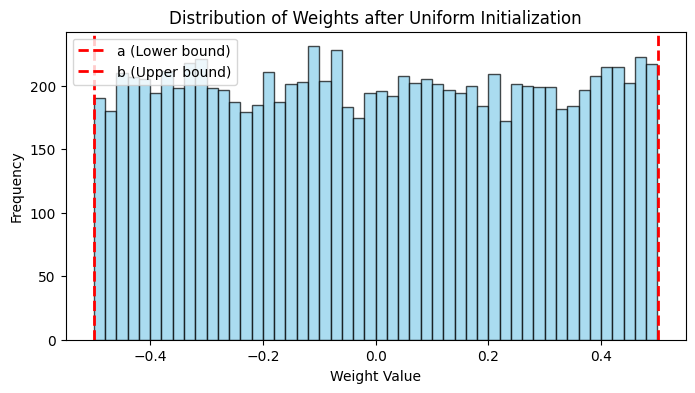

In [22]:

import torch.nn as nn
import matplotlib.pyplot as plt
import numpy

# 1. Simulate a Linear layer in a Neural Network
# Input: 100 features, Output: 100 features -> Total 10,000 weights
layer = nn.Linear(in_features=100, out_features=100)

# 2. Initialize weights using Uniform distribution
# Suppose we want weights in range [-0.5, 0.5]
a, b = -0.5, 0.5
nn.init.uniform_(layer.weight, a=a, b=b)

# 3. Extract weight data for inspection
weights = numpy.array(layer.weight.data.detach().flatten().tolist())

print(f"Initialization range: [{a}, {b}]")
print(f"Actual Min: {weights.min():.4f}")
print(f"Actual Max: {weights.max():.4f}")
print(f"Actual Mean (expected is 0): {weights.mean():.4f}")

# 4. Plot Histogram to see "flatness"
plt.figure(figsize=(8, 4))
plt.hist(weights, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Weights after Uniform Initialization")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.axvline(a, color='red', linestyle='dashed', linewidth=2, label='a (Lower bound)')
plt.axvline(b, color='red', linestyle='dashed', linewidth=2, label='b (Upper bound)')
plt.legend()
plt.show()

## 2.4. Binomial Distribution

### Definition

it is a discrete probability distribution with two parameters $n$ and $p$, denoting the number of successes in $n$ independent trials seeking a yes/no success result.

Imagine you don't just toss a coin once (Bernoulli), but toss $n$ times consecutively and independently. You count how many times heads appear.

Let $X_i$ be the result of the $i$-th toss (1 if heads, 0 if tails), then $X_i \sim \text{Bernoulli}(p)$.

The Binomial random variable $X$ is the total number of successes:

$$X = \sum_{i=1}^n X_i$$

Notation: $X \sim \text{Binomial}(n, p)$.

**Probability Mass Function (PMF):**

The probability of having exactly $k$ successes in $n$ trials is:

$$P(X=k) = \binom{n}{k} p^k (1-p)^{n-k}$$

Where $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ is the number of ways to choose $k$ successes from $n$ trials.

**Cumulative Distribution Function (CDF):**

$$F(x) = \begin{cases} 0 & \text{if } x < 0 \\ \sum_{k=0}^{\lfloor x \rfloor} \binom{n}{k} p^k (1-p)^{n-k} & \text{if } 0 \le x < n \\ 1 & \text{if } x \ge n \end{cases}$$

**Expectation:**

$$\mu_X = np$$

**Variance:**

$$\sigma_X^2 = np(1-p)$$

### Graph


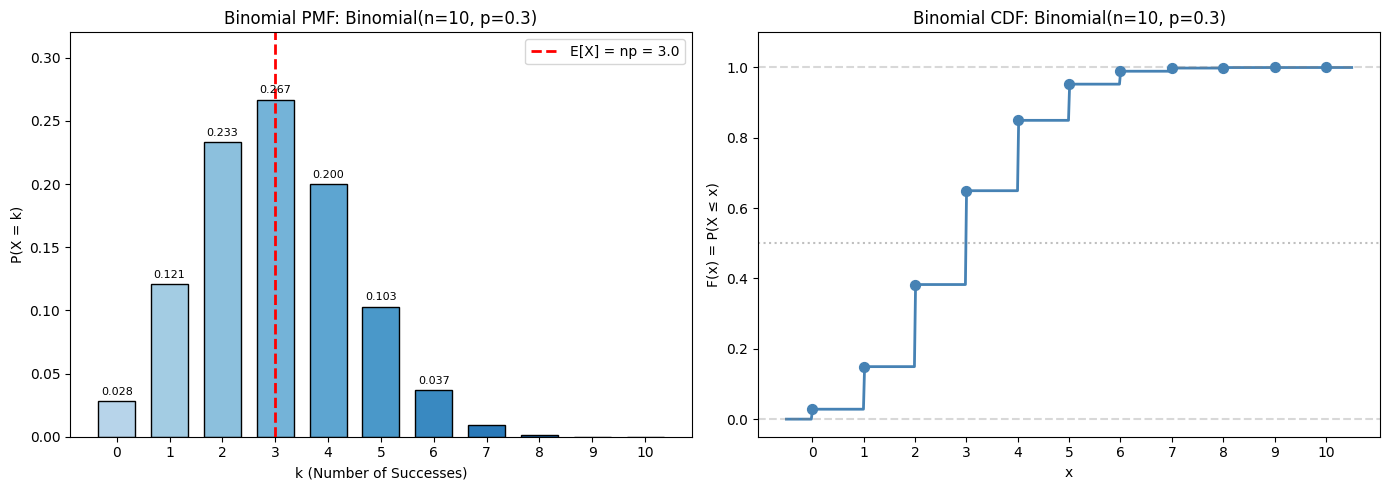

Binomial Distribution: Binomial(n=10, p=0.3)
  Mean (μ) = np = 3.00
  Variance (σ²) = np(1-p) = 2.1000
  Standard Deviation (σ) = 1.4491


In [6]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from math import comb

# Binomial parameters
n = 10  # Number of trials
p = 0.3  # Probability of success

# --- PMF Plot ---
k_values = list(range(0, n + 1))
pmf_values = [comb(n, k) * (p ** k) * ((1 - p) ** (n - k)) for k in k_values]

# --- CDF Plot ---
x_cdf = np.linspace(-0.5, n + 0.5, 500)
cdf_values = []
for x in x_cdf:
    if x < 0:
        cdf_values.append(0)
    elif x >= n:
        cdf_values.append(1)
    else:
        cdf_values.append(sum(pmf_values[:int(np.floor(x)) + 1]))
cdf_values = np.array(cdf_values)

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PMF plot (bar chart)
colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(k_values)))
bars = axes[0].bar(k_values, pmf_values, color=colors, edgecolor='black', width=0.7)
axes[0].set_xlabel('k (Number of Successes)')
axes[0].set_ylabel('P(X = k)')
axes[0].set_title(f'Binomial PMF: Binomial(n={n}, p={p})')
axes[0].set_xticks(k_values)
axes[0].set_ylim(0, max(pmf_values) * 1.2)
# Mark the expected value
mean = n * p
axes[0].axvline(x=mean, color='red', linestyle='--', linewidth=2, label=f'E[X] = np = {mean:.1f}')
axes[0].legend()
# Add value labels on top bars
for i, (k, v) in enumerate(zip(k_values, pmf_values)):
    if v > 0.01:
        axes[0].text(k, v + 0.005, f'{v:.3f}', ha='center', fontsize=8)

# CDF plot (step function)
axes[1].plot(x_cdf, cdf_values, color='steelblue', linewidth=2)
# Mark the jump points
cdf_at_k = [sum(pmf_values[:k+1]) for k in k_values]
axes[1].scatter(k_values, cdf_at_k, color='steelblue', s=50, zorder=5)
axes[1].axhline(y=0, color='gray', linestyle='--', alpha=0.3)
axes[1].axhline(y=1, color='gray', linestyle='--', alpha=0.3)
axes[1].axhline(y=0.5, color='gray', linestyle=':', alpha=0.5)
axes[1].set_xlabel('x')
axes[1].set_ylabel('F(x) = P(X ≤ x)')
axes[1].set_title(f'Binomial CDF: Binomial(n={n}, p={p})')
axes[1].set_ylim(-0.05, 1.1)
axes[1].set_xticks(k_values)

plt.tight_layout()
plt.show()

# Print statistics
variance = n * p * (1 - p)
print(f"Binomial Distribution: Binomial(n={n}, p={p})")
print(f"  Mean (μ) = np = {mean:.2f}")
print(f"  Variance (σ²) = np(1-p) = {variance:.4f}")
print(f"  Standard Deviation (σ) = {np.sqrt(variance):.4f}")


### Step-by-step Computation

**Probability Mass Function (PMF)**

Need to prove:

$$P(X=k) = \binom{n}{k} p^k (1-p)^{n-k}$$

**Step 1: Probability of a specific scenario**

Suppose you toss a coin $n$ times. You want exactly $k$ heads (Success - $S$) and $n-k$ tails (Failure - $F$).

Imagine the simplest scenario: the first $k$ times are all heads, and all remaining $n-k$ times are tails.

The sequence of results will look like this:

$$\underbrace{S, S, \dots, S}_{k \text{ times}}, \underbrace{F, F, \dots, F}_{n-k \text{ times}}$$

Since the tosses are independent (the result of this one doesn't affect the other), we multiply the probabilities of each toss together:

- Probability of $S$ is $p$.
    
- Probability of $F$ is $(1-p)$.
    

So the probability of this specific sequence is:

$$P(\text{specific sequence}) = \underbrace{p \cdot p \dots p}_{k \text{ times}} \cdot \underbrace{(1-p) \cdot (1-p) \dots (1-p)}_{n-k \text{ times}} = p^k (1-p)^{n-k}$$

**Step 2: Counting the number of scenarios (Combinations)**

The problem is that the $k$ heads don't necessarily have to be at the beginning. They can be scrambled anywhere in the sequence of $n$ trials.

Example: $S, F, S, F \dots$ or $F, F, S, S \dots$

The question becomes: How many ways are there to arrange $k$ letters $S$ into $n$ empty positions?

This is the Combination problem in mathematics: Choose $k$ positions from $n$ positions (order of selection doesn't matter).

The number of ways to choose is:

$$\binom{n}{k} = C_n^k = \frac{n!}{k!(n-k)!}$$

**Step 3: Putting it together**

The overall probability $P(X=k)$ is the sum of probabilities of all possible scenarios.

Since these scenarios are mutually exclusive (you can't roll sequence A and sequence B at the same time), and each scenario has the same probability of $p^k (1-p)^{n-k}$ (calculated in Step 1), we perform multiplication:

$$\text{Total Probability} = (\text{Number of scenarios}) \times (\text{Probability of one scenario})$$

$$P(X=k) = \binom{n}{k} \cdot p^k (1-p)^{n-k}$$

**Cumulative Distribution Function (CDF)**

Starting from the original definition of CDF:

$$F(x) = P(X \le x)$$

The Binomial random variable $X$ only takes integer values belonging to the set $\{0, 1, 2, \dots, n\}$.

Formula to be proved:

$$F(x) = \begin{cases} 0 & \text{if } x < 0 \\ \sum_{k=0}^{\lfloor x \rfloor} \binom{n}{k} p^k (1-p)^{n-k} & \text{if } 0 \le x < n \\ 1 & \text{if } x \ge n \end{cases}$$

We consider 3 cases of $x$ on the real number line:

**Case 1: $x < 0$**

Random variable $X$ counts the number of successes, so $X$ cannot be negative ($X \ge 0$). Therefore, the event $\{X \le x\}$ with $x < 0$ is an impossible event.

$$F(x) = P(X \le x) = 0$$

**Case 2: $0 \le x < n$**

We need to calculate the sum of probabilities of all integer values $k$ that $X$ can take such that $k \le x$. Since $k$ must be an integer, the condition $k \le x$ is equivalent to $k \le \lfloor x \rfloor$ (the largest integer not exceeding $x$).

Example: If $x=2.7$, then the valid integer values are $0, 1, 2$. We see $\lfloor 2.7 \rfloor = 2$.

Thus $F(x)$ is the sum of probabilities $P(X=k)$ running from $k=0$ to the upper limit $\lfloor x \rfloor$:

$$F(x) = \sum_{k=0}^{\lfloor x \rfloor} P(X=k)$$

Substitute the Binomial PMF formula in:

$$F(x) = \sum_{k=0}^{\lfloor x \rfloor} \binom{n}{k} p^k (1-p)^{n-k}$$

**Expectation ($\mu_X$):**

We have the definition $X$ is the sum of $X_i$:

$$\mathbb{E}[X] = \mathbb{E}\left[ \sum_{i=1}^n X_i \right]$$

Applying the linearity property of expectation (Expectation of a sum equals the sum of expectations), we have:

$$\mathbb{E}[X] = \sum_{i=1}^n \mathbb{E}[X_i]$$

Since each $X_i \sim \text{Bernoulli}(p)$ then $\mathbb{E}[X_i] = p$ (as proved in the previous section). Substituting in, we get:

$$\mathbb{E}[X] = \sum_{i=1}^n p = n \cdot p$$

**Variance ($\sigma_X^2$):**

We have the definition $X$ is the sum of $X_i$:

$$\text{Var}(X) = \text{Var}\left( \sum_{i=1}^n X_i \right)$$

Assuming the variables $X_i$ are independent of each other, applying the property that the variance of a sum equals the sum of variances:

$$\text{Var}(X) = \sum_{i=1}^n \text{Var}(X_i)$$

Since each $X_i \sim \text{Bernoulli}(p)$ then $\text{Var}(X_i) = p(1-p)$. Substituting in, we have:

$$\text{Var}(X) = \sum_{i=1}^n p(1-p) = n \cdot p(1-p)$$


### Concrete Example

### System Reliability

You are operating a Data Center. You use a RAID 6 (Redundant Array of Independent Disks) storage system. This system consists of $n = 8$ hard drives.

- According to technical specifications, the probability of a hard drive failing in 1 year is $p = 5\%$ ($0.05$).
    
- The hard drives fail independently of each other.
    
- You want to calculate the risk probability to know whether to buy additional data insurance.
    

**Question:** What is the probability that exactly 2 hard drives fail together this year? ($k=2$).

(Note: RAID 6 is still safe if 2 drives fail, but this is a red alert threshold).


### Python Implementation

This code segment simulates the calculation above using torch, and simultaneously illustrates calculating CDF (probability of failing at least how many drives).

In [23]:
import torch

# --- PART 1: THEORETICAL CALCULATION ---
# RAID problem configuration
n_drives = 8 # Total number of hard drives
p_fail = 0.05 # Failure probability of 1 drive (5%)

# Create Binomial distribution
# Note: PyTorch uses probs for p
binom_dist = torch.distributions.binomial.Binomial(total_count=n_drives, probs=p_fail)

# Calculate PMF at k=2 (Exactly 2 failed drives)
k_fail = 2
# log_prob returns logarithm of probability, so need exp() to get actual probability
prob_exact_2 = torch.exp(binom_dist.log_prob(torch.tensor(float(k_fail))))

print(f"1. Probability of having exactly {k_fail} failed hard drives (PMF): {prob_exact_2.item():.5f}")
# Result should be approximately 0.05146 as calculated by hand

# --- PART 2: REAL WORLD APPLICATION (CDF) ---
# RAID 6 is safe if number of failed drives <= 2. System CRASHES (Data Loss) if > 2 drives fail (i.e. 3, 4... 8).
# P(Crash) = P(X >= 3) = 1 - P(X <= 2) = 1 - CDF(2)

# Calculate CDF manually by accumulating PMF from 0 to 2
prob_safe = 0.0
for k in range(3): # k = 0, 1, 2
    prob_k = torch.exp(binom_dist.log_prob(torch.tensor(float(k))))
    prob_safe += prob_k

prob_crash = 1.0 - prob_safe

print(f"2. Probability system is still safe (failed <= 2 drives): {prob_safe.item():.5f}")
print(f"3. Risk of DATA LOSS (failed > 2 drives): {prob_crash.item():.5f}")
# This result (Crash Risk) is an important figure to report to the boss!

1. Probability of having exactly 2 failed hard drives (PMF): 0.05146
2. Probability system is still safe (failed <= 2 drives): 0.99421
3. Risk of DATA LOSS (failed > 2 drives): 0.00579


## 2.5. Poisson Distribution

### Definition

**Idea**

Law of Rare Events. Imagine you are standing at a bus stop.

If you divide 1 minute into 60 seconds. In each second, the probability of a bus arriving is very small (rare).

However, if you accumulate a whole hour, surely a few buses will arrive.

When we take the Binomial distribution $(n, p)$, keeping the expectation $\lambda = np$ constant, but letting the number of trials $n \to \infty$ (dividing time infinitely small) and the probability of success $p \to 0$ (event is very rare in that moment), we will obtain the Poisson distribution.

**Definition**

The Poisson distribution is a discrete probability distribution used to describe the number of occurrences of a random event in a fixed interval of time or space, with the parameter λ representing the average number of times the event occurs.

Notation: $X \sim \text{Poisson}(\lambda)$.

$\lambda > 0$ is the average rate or the expected number of events occurring in a unit of time.

**Probability Mass Function (PMF):**

The probability that exactly $k$ events occur is:

$$P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!}$$

(With $k \in \{0, 1, 2, ...\}$)

**Cumulative Distribution Function (CDF):**

$$F(x) = \begin{cases}

0 & \text{if } x < 0 \\

e^{-\lambda} \sum_{k=0}^{\lfloor x \rfloor} \frac{\lambda^k}{k!} & \text{if } x \ge 0

\end{cases}$$

**Expectation:**

$$\mu_X = \lambda$$

**Variance:**

$$\sigma_X^2 = \lambda$$

### Step-by-step Computation 

**Probability Mass Function (PMF):**

Assumption:

The probability of the event occurring follows the Binomial distribution $X \sim \text{Binomial}(n, p)$.

We consider the limit when the number of trials $n \to \infty$, the probability of success each time $p \to 0$, but the average expectation $\lambda = n p$ is kept fixed (constant).

Then $p = \frac{\lambda}{n}$.

We need to prove $\lim_{n \to \infty} P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!}$.

Step 1: Write the Binomial PMF formula

$$P(X=k) = \binom{n}{k} p^k (1-p)^{n-k}$$

Substitute $p = \frac{\lambda}{n}$ into the formula:

$$P(X=k) = \frac{n!}{k!(n-k)!} \left(\frac{\lambda}{n}\right)^k \left(1 - \frac{\lambda}{n}\right)^{n-k}$$

Step 2: Expand factorial and power

We know $\frac{n!}{(n-k)!} = n(n-1)(n-2)\dots(n-k+1)$.

Separate the components in the expression:

$$P(X=k) = \frac{1}{k!} \cdot \underbrace{n(n-1)\dots(n-k+1)}_{\text{Factorial numerator}} \cdot \underbrace{\frac{\lambda^k}{n^k}}_{\text{Separate } p^k} \cdot \underbrace{\left(1 - \frac{\lambda}{n}\right)^n \left(1 - \frac{\lambda}{n}\right)^{-k}}_{\text{Separate } (1-p)^{n-k}}$$

Step 3: Group variables dependent on $n$

Rearrange to easily calculate the limit:

$$P(X=k) = \frac{\lambda^k}{k!} \cdot \underbrace{\frac{n(n-1)\dots(n-k+1)}{n^k}}_{\text{Group A}} \cdot \underbrace{\left(1 - \frac{\lambda}{n}\right)^n}_{\text{Group B}} \cdot \underbrace{\left(1 - \frac{\lambda}{n}\right)^{-k}}_{\text{Group C}}$$

Step 4: Calculate the limit of each group as $n \to \infty$

Group A: Divide $n^k$ (consisting of $k$ numbers of $n$) for each term in the numerator:

$$\lim_{n \to \infty} \frac{n}{n} \cdot \frac{n-1}{n} \cdots \frac{n-k+1}{n} = 1 \cdot (1-0) \cdots (1-0) = 1$$

Group B: This is the basic limit definition of the exponential function:

$$\lim_{n \to \infty} \left(1 - \frac{\lambda}{n}\right)^n = e^{-\lambda}$$

Group C: When $n \to \infty$ then $\frac{\lambda}{n} \to 0$:

$$\lim_{n \to \infty} \left(1 - 0\right)^{-k} = 1$$

Step 5: Conclusion

Multiply the results together:

$$P(X=k) = \frac{\lambda^k}{k!} \cdot 1 \cdot e^{-\lambda} \cdot 1$$

$$\Rightarrow P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!} \quad \text{(Required to be proved)}$$

**Cumulative Distribution Function (CDF):**

Need to prove:


$$F(x) = \begin{cases}

0 & \text{if } x < 0 \\

e^{-\lambda} \sum_{k=0}^{\lfloor x \rfloor} \frac{\lambda^k}{k!} & \text{if } x \ge 0

\end{cases}$$

We start from the original definition of the cumulative distribution function:

$$F(x) = P(X \le x)$$

The Poisson random variable $X$ only takes non-negative integer values: $\{0, 1, 2, \dots\}$.

Case 1: $x < 0$

Since $X$ always takes non-negative values ($X \ge 0$), the event $\{X \le x\}$ with $x < 0$ is impossible.

Therefore: $F(x) = 0$.

Case 2: $x \ge 0$

To calculate $P(X \le x)$, we need to sum the probabilities of all integer values $k$ that variable $X$ can take, provided $k$ does not exceed $x$.

The condition "$k$ is an integer and $k \le x$" is equivalent to "$k$ is an integer and $k \le \lfloor x \rfloor$".

Thus we have:

$$F(x) = \sum_{k=0}^{\lfloor x \rfloor} P(X=k)$$

Substitute the Poisson probability mass function (PMF) formula: $P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!}$.

$$F(x) = \sum_{k=0}^{\lfloor x \rfloor} \frac{\lambda^k e^{-\lambda}}{k!}$$

Since $e^{-\lambda}$ is constant with respect to the running index $k$, we can take it out of the sum (distributive property of multiplication):

$$F(x) = e^{-\lambda} \sum_{k=0}^{\lfloor x \rfloor} \frac{\lambda^k}{k!}$$

**Expectation ($\mu_X$):**

According to the definition of expectation we have:

$$\mathbb{E}[X] = \sum_{k=0}^{\infty} k \cdot P(X=k)$$

Substituting the Poisson probability mass function (PMF) formula $P(X=k) = \frac{e^{-\lambda}\lambda^k}{k!}$, we get:

$$\mathbb{E}[X] = \sum_{k=0}^{\infty} k \cdot \frac{\lambda^k e^{-\lambda}}{k!}$$

At $k=0$, the first term equals $0$, so we can ignore it and start the sum from $k=1$:

$$\mathbb{E}[X] = \sum_{k=1}^{\infty} k \cdot \frac{\lambda^k e^{-\lambda}}{k!}$$

Proceed to expand the factorial $k! = k \cdot (k-1)!$, simplify $k$ in the numerator and denominator, and simultaneously move the constant $e^{-\lambda}$ outside the sum:

$$\mathbb{E}[X] = e^{-\lambda} \sum_{k=1}^{\infty} \frac{k \cdot \lambda^k}{k(k-1)!} = e^{-\lambda} \sum_{k=1}^{\infty} \frac{\lambda^k}{(k-1)!}$$

Separate one $\lambda$ out so that $\lambda^{k-1}$ remains inside the sum:

$$\mathbb{E}[X] = \lambda e^{-\lambda} \sum_{k=1}^{\infty} \frac{\lambda^{k-1}}{(k-1)!}$$

Set the auxiliary variable $j = k - 1$. When $k=1$ then $j=0$. When $k \to \infty$ then $j \to \infty$. The sum in the brackets is the Taylor expansion of the function $e^\lambda$:

$$\mathbb{E}[X] = \lambda e^{-\lambda} \underbrace{\sum_{j=0}^{\infty} \frac{\lambda^j}{j!}}_{e^\lambda}$$

Finally, replace the sum with $e^\lambda$ and simplify (since $e^{-\lambda} \cdot e^{\lambda} = 1$):

$$\mathbb{E}[X] = \lambda e^{-\lambda} \cdot e^{\lambda} = \lambda$$

**Variance ($\sigma_X^2$):**

We have the formula for variance:

$$\text{Var}(X) = \mathbb{E}[X^2] - (\mathbb{E}[X])^2$$

We already know the expectation $\mathbb{E}[X] = \lambda$. So the key is to calculate the 2nd Moment ($\mathbb{E}[X^2]$).

Using the identity $k^2 = k(k-1) + k$, we analyze:

$$\mathbb{E}[X^2] = \mathbb{E}[X(X-1) + X] = \mathbb{E}[X(X-1)] + \mathbb{E}[X]$$

$$\mathbb{E}[X^2] = \mathbb{E}[X(X-1)] + \lambda$$

Now we calculate the expectation of the factorial $\mathbb{E}[X(X-1)]$ according to the definition (LOTUS):

$$\mathbb{E}[X(X-1)] = \sum_{k=0}^{\infty} k(k-1) \cdot \frac{\lambda^k e^{-\lambda}}{k!}$$

At $k=0$ and $k=1$, the product $k(k-1) = 0$ so we ignore it and start the sum from $k=2$. Simplify the factorial $\frac{k(k-1)}{k!} = \frac{1}{(k-2)!}$, we have:

$$\mathbb{E}[X(X-1)] = e^{-\lambda} \sum_{k=2}^{\infty} \frac{\lambda^k}{(k-2)!}$$

Set the auxiliary variable $j = k - 2$. Then $\lambda^k = \lambda^{j+2} = \lambda^2 \cdot \lambda^j$. Bring $\lambda^2$ outside:

$$\mathbb{E}[X(X-1)] = \lambda^2 e^{-\lambda} \underbrace{\sum_{j=0}^{\infty} \frac{\lambda^j}{j!}}_{e^\lambda}$$

The sum in the brackets is the Taylor expansion of the function $e^\lambda$. Substituting in we get:

$$\mathbb{E}[X(X-1)] = \lambda^2 e^{-\lambda} \cdot e^{\lambda} = \lambda^2$$

Implies the 2nd moment is:

$$\mathbb{E}[X^2] = \lambda^2 + \lambda$$

Finally, substitute into the initial variance formula:

$$\text{Var}(X) = (\lambda^2 + \lambda) - \lambda^2 = \lambda$$

Thus with the Poisson distribution, both Expectation and Variance equal $\lambda$.

### Concrete Example

**DDoS Detection (Denial of Service)**

In cybersecurity, normal traffic to a website often follows a Poisson distribution.

Users access independently of each other.

Average access speed ($\lambda$) is usually stable within a certain time frame.

If the number of requests suddenly spikes far beyond the allowable threshold of the Poisson distribution (lying in the extreme tail of the graph), the system will flag it as an anomaly or a potential DDoS attack.

Concrete Example:

You manage a Login Server.

Normal: Average $\lambda = 5$ failed logins in 1 minute (due to users forgetting passwords).

Event: In the past minute, the system recorded 12 failed logins.

Question: What is the probability of this happening randomly? If the probability is too low (< 1%), we conclude this is a Brute-force attack and block the IP.



### Python Implementation

In [24]:

import torch

# 1. System configuration
# Average rate of failed logins/minute
lambda_normal = 5.0

# Number of failures observed in the current minute
observed_failures = 12

# 2. Build Poisson model
# This is the "Baseline" of the normal system
poisson_model = torch.distributions.poisson.Poisson(rate=lambda_normal)

# 3. Calculate Anomaly Score
# We calculate P-value: Probability that X >= observed_failures happens randomly
# P(X >= k) = 1 - P(X <= k-1) = 1 - CDF(k-1)

# Calculate CDF at k-1 = 11
cdf_val = 0.0
for k in range(observed_failures): # runs from 0 to 11
    # log_prob returns logarithm, need exp to get probability
    prob_k = torch.exp(poisson_model.log_prob(torch.tensor(float(k))))
    cdf_val += prob_k

p_value = 1.0 - cdf_val

# 4. Decision Making
# Confidence threshold alpha = 0.01 (1%)
alpha = 0.01

print(f"Average (Normal): {lambda_normal} fails/minute")
print(f"Observed (Observed): {observed_failures} fails/minute")
print(f"P-value (Random probability): {p_value.item():.6f}")

# This graph helps visualize the tail of the distribution

if p_value < alpha:
    print(">>> WARNING: Brute-force attack detected! (P-value < 1%)")
else:
    print(">>> NORMAL: Could be due to users forgetting passwords.")


Average (Normal): 5.0 fails/minute
Observed (Observed): 12 fails/minute
P-value (Random probability): 0.005453
>>> WARNING: Brute-force attack detected! (P-value < 1%)


## 2.6. Gaussian Distribution

### Definition

A random variable $X$ follows a Gaussian distribution with mean $\mu$ and variance $\sigma^2$, denoted $X \sim \mathcal{N}(\mu, \sigma^2)$, having the probability density function (PDF):

$$p_{X}(x)=\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}$$

$\mu$ (Mean): Determines the center position of the "bell".

$\sigma^2$ (Variance): Determines the width of the distribution.

**Cumulative Distribution Function (CDF)**

The document emphasizes that the Gaussian CDF does not have a closed-form using elementary functions. To calculate, we must use the error function erf:

$$F(x) = \frac{1}{2} \left[ 1 + \text{erf}\left( \frac{x - \mu}{\sigma\sqrt{2}} \right) \right]$$

### Step-by-step Computation (this is math proof)

**Origin: The Central Limit Theorem**

Unlike Poisson (where we let $n \to \infty$ and $p \to 0$), the Gaussian distribution appears from another limit problem of the Binomial distribution.

Suppose we have a sum $X^{(n)}$ of $n$ independent Bernoulli random variables with fixed probability $p$. When $n \to \infty$, both the expectation ($\mu = np$) and variance ($\sigma^2 = np(1-p)$) approach infinity, causing the distribution to "flatten" out and become hard to define.

To solve this, we standardize this random variable:

$$Y^{(n)} = \frac{X^{(n)} - \mu_{X^{(n)}}}{\sigma_{X^{(n)}}}$$

This variable $Y^{(n)}$ has a mean of 0 and variance of 1.

The Central Limit Theorem (CLT) states that when $n \to \infty$, the distribution of $Y^{(n)}$ will converge to the standard Gaussian distribution:

$$\lim_{n\rightarrow\infty}P(Y^{(n)}\in[a,b])=P(\mathcal{N}(0,1)\in[a,b])$$

This is the reason Gaussian is the foundation of Machine Learning: Whenever we measure the sum of many small independent contributions, the result will approximate a Gaussian.

### Concrete Example

**Maximum Entropy Property**

This is the most important philosophical property of Gaussian mentioned in the document. Gaussian is the distribution with Maximum Entropy among distributions with the same mean and variance.

Significance: It is the "most random" and "most conservative" choice.

Application: If we only know the data has a fixed Mean and Variance without knowing anything else, assuming it is Gaussian is safest because we do not impose any additional hidden structures (like symmetry or boundary limits) on the data.

### Python Implementation

In [25]:
import torch
import math

# 1. Parameter configuration
mu = 0.0
sigma = 1.0

# 2. Probability Density Function (PDF) - Formula A.17
def gaussian_pdf(x, mu, sigma):
    # Normalization coefficient: 1 / sqrt(2 * pi * sigma^2)
    coefficient = 1.0 / math.sqrt(2 * math.pi * sigma**2)
    # Exponent part: -(x - mu)^2 / (2 * sigma^2)
    exponent = torch.exp(-(x - mu)**2 / (2 * sigma**2))
    return coefficient * exponent

# 3. Cumulative Distribution Function (CDF) - Using erf function
# Book uses integral approximation formula using erf
def gaussian_cdf(x, mu, sigma):
    # Formula: 0.5 * (1 + erf((x - mu) / (sigma * sqrt(2))))
    return 0.5 * (1 + torch.erf((x - mu) / (sigma * math.sqrt(2))))

# --- Illustration ---
x_val = torch.tensor(0.0) # At the bell peak

pdf_val = gaussian_pdf(x_val, mu, sigma)
cdf_val = gaussian_cdf(x_val, mu, sigma)

print(f"Gaussian N({mu}, {sigma}^2) at x = {x_val}")
print(f"PDF (Theory ~ 0.3989): {pdf_val:.4f}")
print(f"CDF (Theory = 0.5):    {cdf_val:.4f}")

# Random sampling as guided by the book
samples = torch.normal(mean=mu, std=sigma, size=(2, 5))
print("\nRandom samples:")
print(samples)

Gaussian N(0.0, 1.0^2) at x = 0.0
PDF (Theory ~ 0.3989): 0.3989
CDF (Theory = 0.5):    0.5000

Random samples:
tensor([[ 1.7807, -0.0463,  0.5470, -0.9630,  1.3793],
        [ 0.8840,  1.1096, -0.7789,  2.4791, -0.2333]])


## 2.6. Exponential Family Distribution

### Definition

A probability distribution belongs to the Exponential Family if its probability density function (PDF) or probability mass function (PMF) can be represented in the following canonical form:

$$p(x|\boldsymbol{\eta}) = h(x) \cdot \exp\left( \boldsymbol{\eta}^\top \cdot T(x) - A(\boldsymbol{\eta}) \right)$$

Where the components are defined in detail as follows:

$\boldsymbol{\eta}$ (Natural Parameters): Also called canonical parameters. This is a vector $\boldsymbol{\eta} = (\eta_1, ..., \eta_l) \in \mathbb{R}^l$ that determines the shape of the distribution.

$T(x)$ (Sufficient Statistics): This is a function of the data $T(x) = (T_1(x), ..., T_l(x))$. It is called "sufficient" because the information contained in $T(x)$ is sufficient to calculate the probability density without retaining the entire original data $x$.

$h(x)$ (Underlying Measure): It represents the underlying structure of the data before being affected by the exponential parameters.

$A(\boldsymbol{\eta})$ (Cumulant Function): Cumulative function (or Log-partition function). Its role is to ensure the integral (or sum) of the probability density function equals 1 (distribution normalization). Its formula is:

$$A(\boldsymbol{\eta}) = \log \left[ \int h(x) \cdot \exp(\boldsymbol{\eta}^\top \cdot T(x)) \, dx \right]$$

### Step-by-step Computation 

Gaussian Analysis

To demonstrate the power of this theory, we will transform the Univariate Gaussian distribution into the canonical form of the exponential family, adhering closely to the transformation steps in the document.

Step 1: Starting from the standard Gaussian PDF

$$p(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \cdot \exp\left\{ -\frac{(x-\mu)^2}{2\sigma^2} \right\}$$

Step 2: Expanding the identity in the exponent

We expand $-(x-\mu)^2 = -(x^2 - 2\mu x + \mu^2) = -x^2 + 2\mu x - \mu^2$.

Substitute into the exponential expression and separate the elements:

$$p(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi}} \cdot \frac{1}{\sigma} \cdot \exp\left\{ \frac{2\mu x - x^2 - \mu^2}{2\sigma^2} \right\}$$

Logarithmic transformation to bring $\frac{1}{\sigma}$ into the exponential function (note $\frac{1}{\sigma} = \exp(-\log \sigma)$):

$$p(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi}} \cdot \exp\left\{ \frac{\mu}{\sigma^2}x - \frac{1}{2\sigma^2}x^2 - \left( \frac{\mu^2}{2\sigma^2} + \log(\sigma) \right) \right\}$$

Step 3: Mapping to the canonical form

Based on the equation above, we identify each corresponding component:

Underlying measure $h(x)$:

$$h(x) = \frac{1}{\sqrt{2\pi}}$$

Natural parameters $\boldsymbol{\eta}$: Is a 2-dimensional vector:

$$\boldsymbol{\eta} = \begin{bmatrix} \eta_1 \\ \eta_2 \end{bmatrix} = \begin{bmatrix} \frac{\mu}{\sigma^2} \\ \frac{1}{2\sigma^2} \end{bmatrix}$$

Sufficient statistics $T(x)$: (Note how the document handles the negative sign)

$$T(x) = \begin{bmatrix} x \\ -x^2 \end{bmatrix}$$

(Check: $\boldsymbol{\eta}^\top T(x) = \frac{\mu}{\sigma^2}x + \frac{1}{2\sigma^2}(-x^2)$, matching the expansion in Step 2).

Cumulant function $A(\boldsymbol{\eta})$:

$$A(\boldsymbol{\eta}) = \frac{\mu^2}{2\sigma^2} + \log(\sigma) = \frac{\eta_1^2}{4\eta_2} - \frac{1}{2}\log(2\eta_2)$$


## Significance in Computer Science

Reducing to the Exponential Family allows us to build generalized machine learning models (Generalized Linear Models - GLM). Instead of having to write separate optimization algorithms for each type of distribution, we can build a general theoretical framework to train for binary data (Bernoulli), count data (Poisson), and real data (Gaussian).

